In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models 
import potential_sweeps as sweep
import plotting

%matplotlib widget

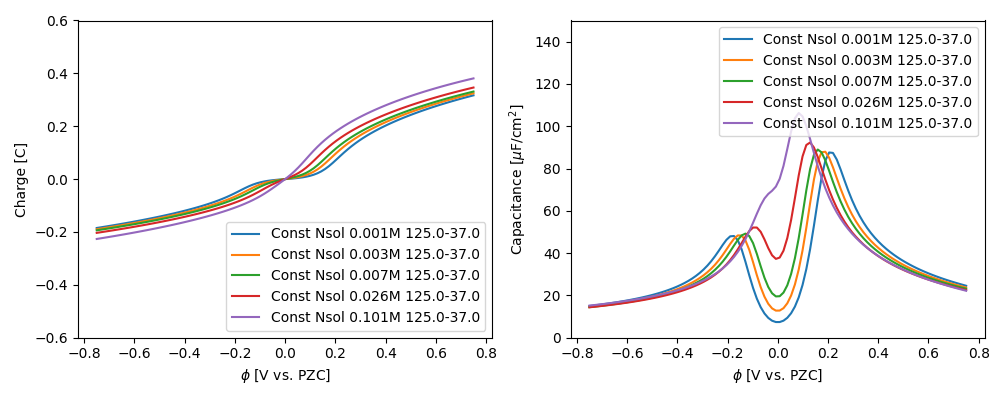

In [2]:
potentials = np.linspace(-0.75, 0.75, 100)

x_list = [0, 2, 6, 25, 100]
sol_list = []

for x in x_list:
    simple = models.HuangSimple(1e-3 + x*1e-3, (15/3)**3, (10/3)**3)
    sol = sweep.numerical(simple, potentials, force_recalculation=True)
    
    sol_list.append(sol)

fig, ax = plotting.plot_potential_sweep(sol_list)

plt.show()